Compute performances of assets conditional on us elections
Need either bbg_fetch package for prices from Bloomberg or yfinance package for prices from Yahoo

In [20]:
# qis analytics
from qis.examples.core.us_election import (compute_conditional_performances, plot_conditional_performances,
                                           plot_unconditional_performances)

In [25]:
# fetch data
# for is_bloomberg_data the terminal needs to be open 
# bloomberg provides longer time series data 

is_bloomberg_data = True

if is_bloomberg_data:
    
    from bbg_fetch import fetch_field_timeseries_per_tickers
    
    tickers = {'SPX Index': 'S&P 500',
               'DXY Curncy': 'DXY',
               'TY1 Comdty': 'UST 10y bond future'}
    prices = fetch_field_timeseries_per_tickers(tickers=tickers, freq='B',
                                                start_date=pd.Timestamp('01Jan1968')).ffill()
else: # use etfs
    
    import yfinance as yf
    
    tickers = {'SPY': 'S&P 500',
               'UUP': 'DXY',
               'TLT': 'UST 20y+ bond'}
    tickers_ = list(tickers.keys())
    prices = yf.download(tickers_, start=None, end=None)['Close'][tickers_].rename(tickers, axis=1)

prices

,S&P 500,DXY,UST 10y bond future
1968-01-02,96.11,NaN,NaN
1968-01-03,95.67,NaN,NaN
1968-01-04,95.36,NaN,NaN
1968-01-05,95.94,NaN,NaN
1968-01-08,96.62,NaN,NaN
...,...,...,...
2024-10-10,5780.05,102.988,112.078125
2024-10-11,5815.03,102.890,112.250000
2024-10-14,5859.85,103.298,111.859375
2024-10-15,5815.26,103.261,112.437500


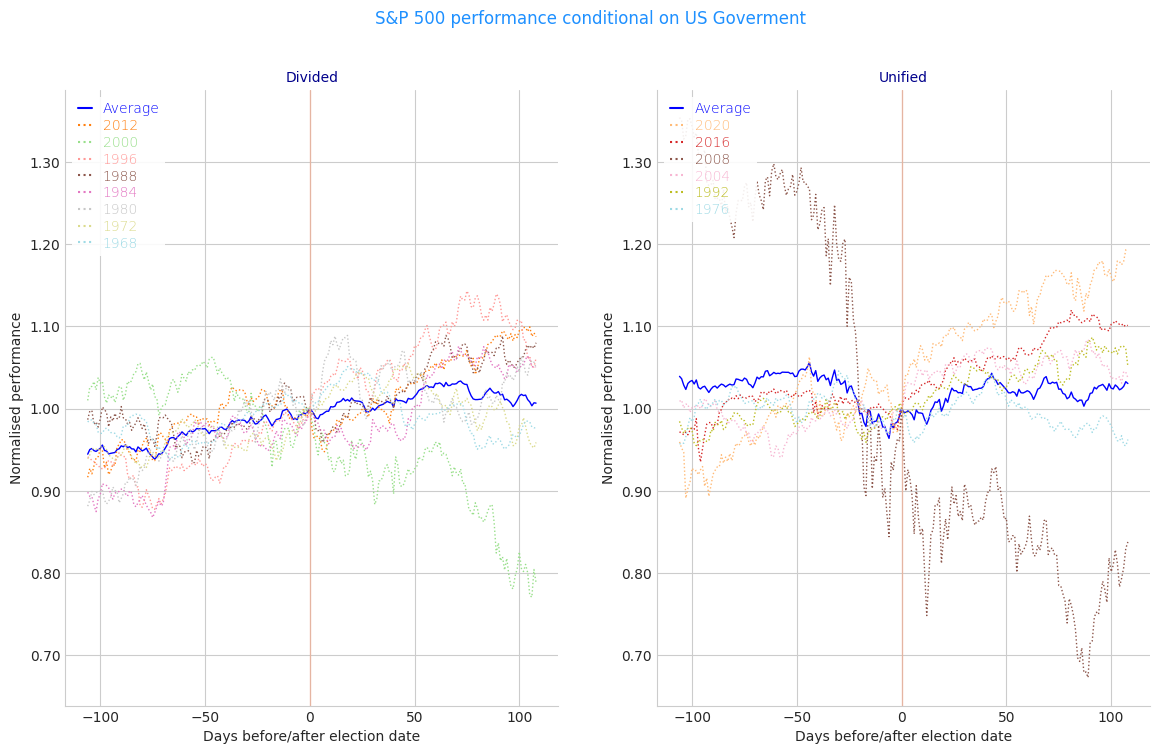

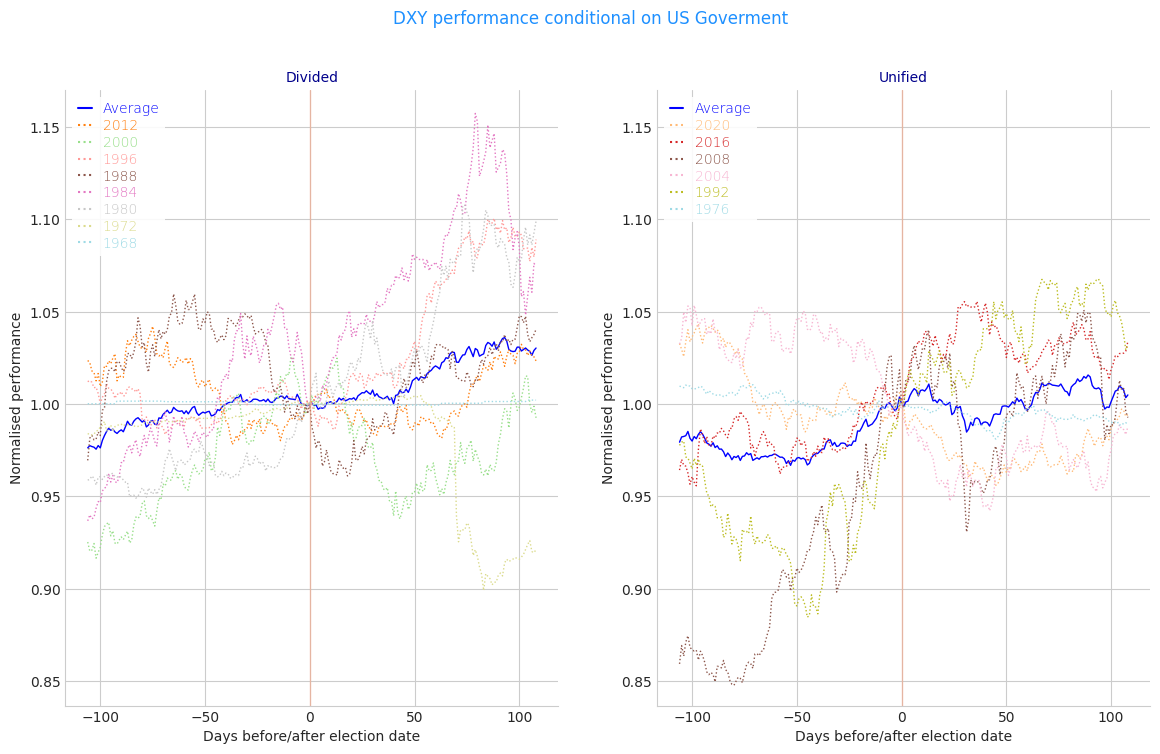

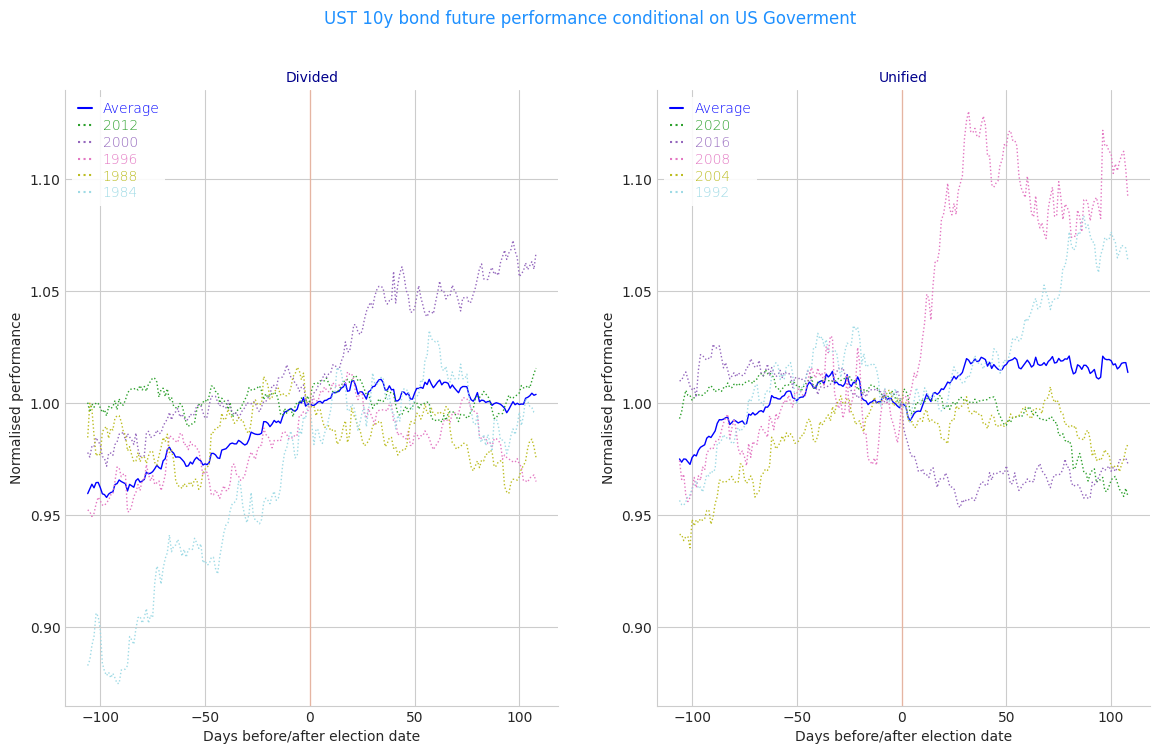

In [26]:
# performances conditional on goverment
for asset in prices.columns:
    price = prices[asset].dropna()
    dfs = compute_conditional_performances(price=price)
    fig = plot_conditional_performances(dfs=dfs, title=f"{asset} performance conditional on US Goverment")

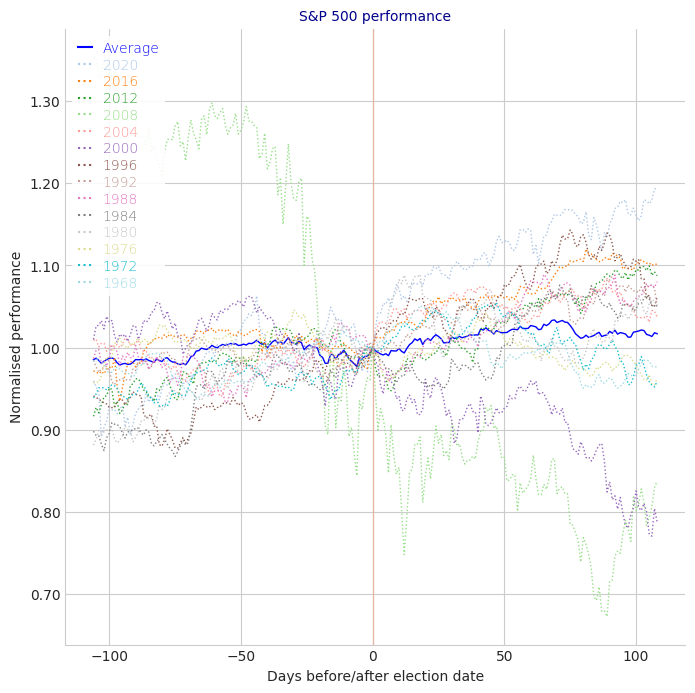

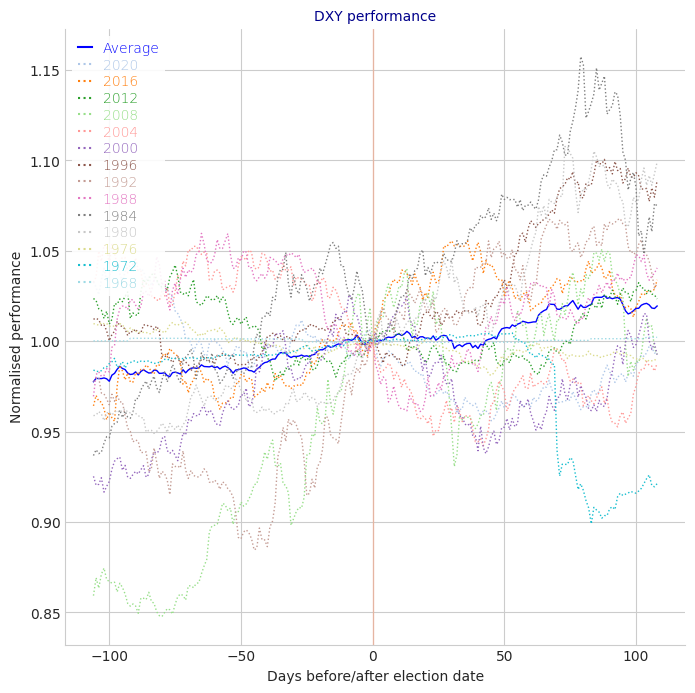

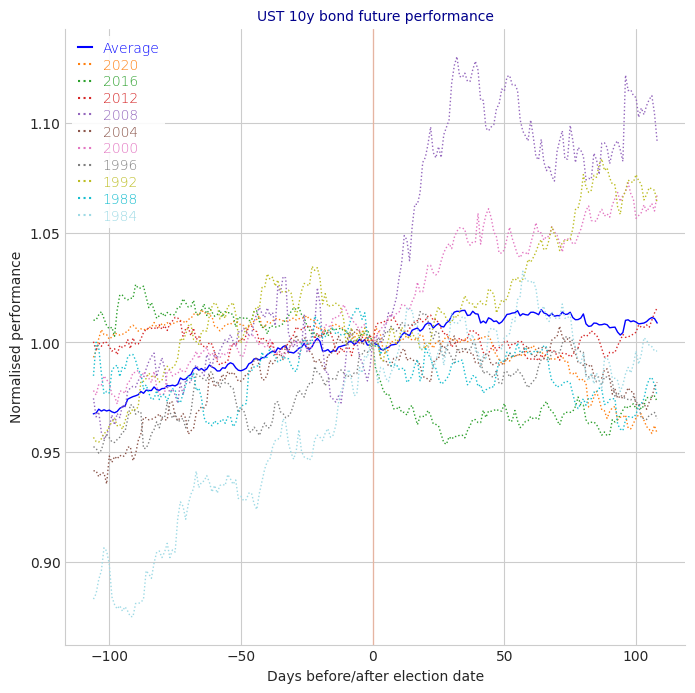

In [27]:
# unconditional performances
for asset in prices.columns:
    fig = plot_unconditional_performances(price=prices[asset].dropna(), title=f"{asset} performance")